In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import SimpleRNN


In [3]:
df = pd.read_csv('../Google_Stock_Price_Train.csv')

In [4]:
df.head()


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
train = df.loc[:,['Open']].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
train_scale = scaler.fit_transform(train)
train_scale

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

Text(0.5, 1.0, 'Google Stock Price')

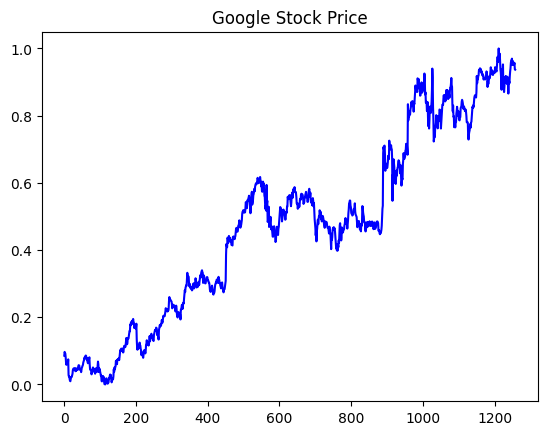

In [7]:
plt.plot(train_scale, color='blue')
plt.title('Google Stock Price')

In [8]:
x_train = []
y_train = []

timesteps = 50
for i in range(timesteps, len(train_scale)):
    x_train.append(train_scale[i-timesteps:i, 0])
    y_train.append(train_scale[i, 0])
    

x_train, y_train = np.array(x_train), np.array(y_train)


In [9]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1208, 50, 1)

In [10]:
# Regressor
regressor = Sequential()
regressor.add(SimpleRNN(units=50,activation='tanh', return_sequences=True, input_shape=(x_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50,activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50,activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 3s 19ms/step - loss: 0.3662
Epoch 2/100
38/38 [==============================] - 1s 19ms/step - loss: 0.2233
Epoch 3/100
38/38 [==============================] - 1s 22ms/step - loss: 0.1556
Epoch 4/100
38/38 [==============================] - 1s 22ms/step - loss: 0.1152
Epoch 5/100
38/38 [==============================] - 1s 20ms/step - loss: 0.0961
Epoch 6/100
38/38 [==============================] - 1s 20ms/step - loss: 0.0743
Epoch 7/100
38/38 [==============================] - 1s 20ms/step - loss: 0.0554
Epoch 8/100
38/38 [==============================] - 1s 20ms/step - loss: 0.0498
Epoch 9/100
38/38 [==============================] - 1s 20ms/step - loss: 0.0444
Epoch 10/100
38/38 [==============================] - 1s 19ms/step - loss: 0.0389
Epoch 11/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0336
Epoch 12/100
38/38 [==============================] - 1s 20ms/step - loss: 0.0320
Epoch 13/100
38/38 [=====

In [11]:
# test model
test = pd.read_csv('../Google_Stock_Price_Test.csv')
test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [13]:
real_stock_price = test.loc[:,['Open']].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [15]:
dataset_total = pd.concat((df['Open'], test['Open']), axis=0)
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [16]:
input = dataset_total[len(dataset_total) - len(test) - timesteps:].values.reshape(-1,1)
input = scaler.transform(input)
input

array([[0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.95762334],
       [0.96413424],
       [0.96402262],
       [0.96971501],
       [0.95077759],
       [0.96294367],
       [0.96123223],
       [0.95475854],
       [0.95204256],
       [0.95163331],
       [0.957

In [18]:
x_test = []
for i in range(timesteps,70):
    x_test.append(input[i-timesteps:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[780.9286 ],
       [779.2985 ],
       [779.79205],
       [780.982  ],
       [782.3568 ],
       [785.9101 ],
       [788.53906],
       [790.63245],
       [790.734  ],
       [790.7729 ],
       [790.261  ],
       [789.7564 ],
       [789.01575],
       [788.9265 ],
       [789.0545 ],
       [792.21625],
       [796.2964 ],
       [800.2627 ],
       [802.0255 ],
       [799.853  ]], dtype=float32)

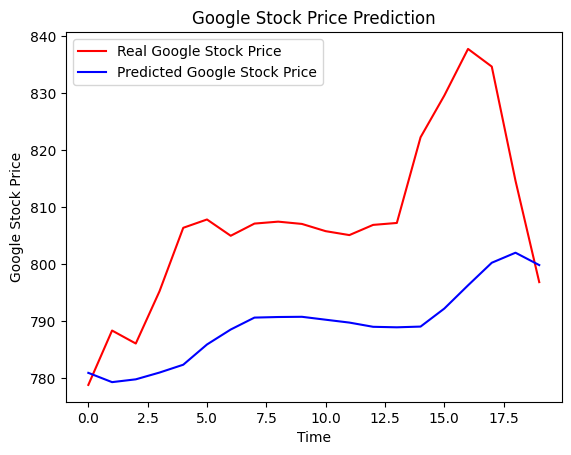

In [19]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
# 
rmse = np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE:', rmse)

RMSE: 21.443342658834094


In [23]:
MAE = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE:', MAE)

MAE: 18.6564365234375


In [24]:
r2 = r2_score(real_stock_price, predicted_stock_price)
print('R2:', r2)

R2: -1.1156606073559603
